In [1]:
#import all neccessary packages
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import rawpy
from scipy.integrate import quad, IntegrationWarning
import warnings
import matplotlib.ticker as ticker


mm = 1e3
eV = 1.602e-19 


In [2]:

def extract_intensity(filepath: str, xmin: int, xmax: int, y: int) -> np.ndarray:
    # Read the NEF image using rawpy
    with rawpy.imread(filepath) as raw:
        # Process the raw image to RGB
        rgb_image = raw.postprocess()

    # Convert the RGB image to grayscale to extract intensity
    grayscale_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140])

    # Extract the intensity values for the selected row (y) and column range (xmin to xmax)
    intensity_values = grayscale_image[y, xmin:xmax]

    return intensity_values

def fit_quadratic(x: np.ndarray, y: np.ndarray):
    coeffs = np.polyfit(x, y, 2)  # Fit y = ax^2 + bx + c
    quadratic_func = np.poly1d(coeffs)
    return coeffs, quadratic_func



import cv2

def color_rectangle_on_nef(filepath: str, x_min: int, x_max: int, y_min: int, y_max: int):
    # Step 1: Read the NEF image using rawpy
    with rawpy.imread(filepath) as raw:
        # Process the raw image into RGB format
        rgb_image = raw.postprocess()

    # Step 2: Convert RGB to Grayscale using weighted sum method (for intensity)
    grayscale_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

    # Step 3: Convert grayscale image to BGR format (needed for color overlay in OpenCV)
    bgr_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    # Step 4: Draw a red rectangle on the selected region (BGR color: (0, 0, 255) is red)
    cv2.rectangle(bgr_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), thickness=4)  
    cv2.line(bgr_image, (x_min, y_min+(y_max-y_min)//2), (x_max, y_min+(y_max-y_min)//2), (255, 0, 0), thickness=4)

    # Step 5: Display the image with the red rectangular selection
    plt.figure()
    plt.imshow(bgr_image)

def edge_detection(filepath: str, x_min: int, x_max: int, y_min: int, y_max: int):
    # Step 1: Read the NEF image using rawpy
    with rawpy.imread(filepath) as raw:
        # Process the raw image into RGB format
        rgb_image = raw.postprocess()

    # Step 2: Convert RGB to Grayscale using weighted sum method (for intensity)
    grayscale_image = np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    # Defining all the parameters 
    t_lower = 195 # Lower Threshold 
    t_upper = 230 # Upper threshold 
    aperture_size = 5 # Aperture size 
    L2Gradient = True # Boolean 
    

    image_edges_detection = cv2.Canny(grayscale_image, t_lower, t_upper, 
                    apertureSize = aperture_size,  
                    L2gradient = L2Gradient ) 
    # image_edges_detection = cv2.Canny(grayscale_image, 100,200)
    y_min = 1800
    y_max = 3357
    y = (y_max - y_min)//2
    plt.figure()
    plt.imshow(image_edges_detection, cmap='gray')
    
    plt.figure()
    plt.title("Intensity distribution with edge detection")
    plt.plot(grayscale_image[y, :], label = 'greyscale image ')




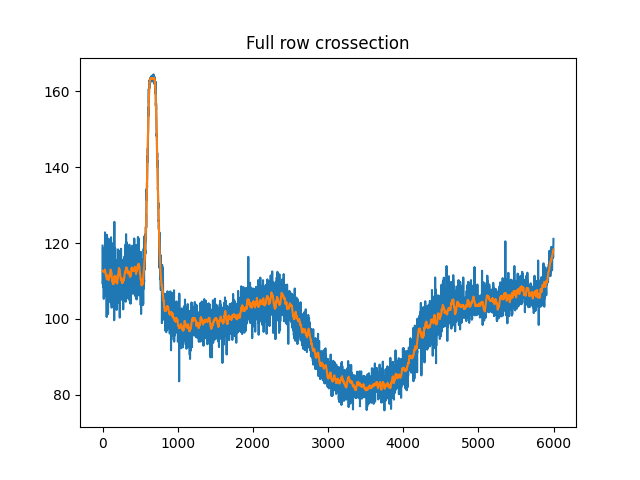

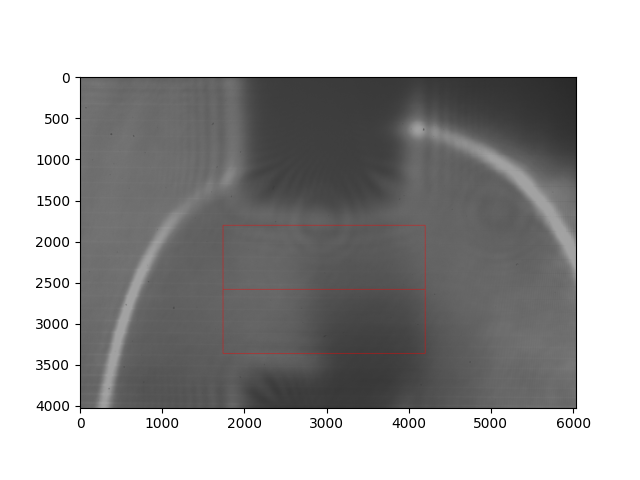

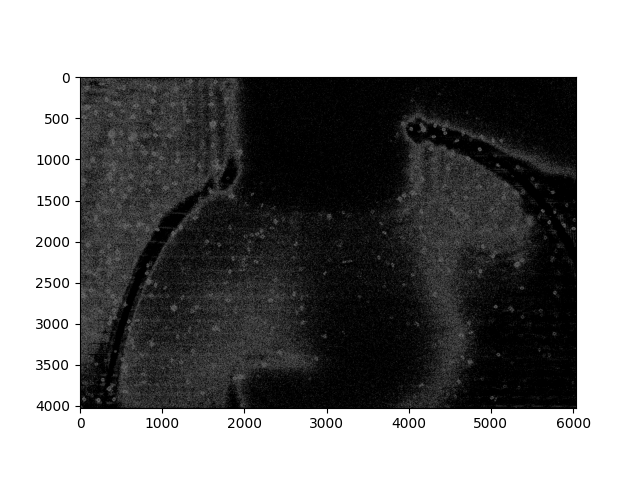

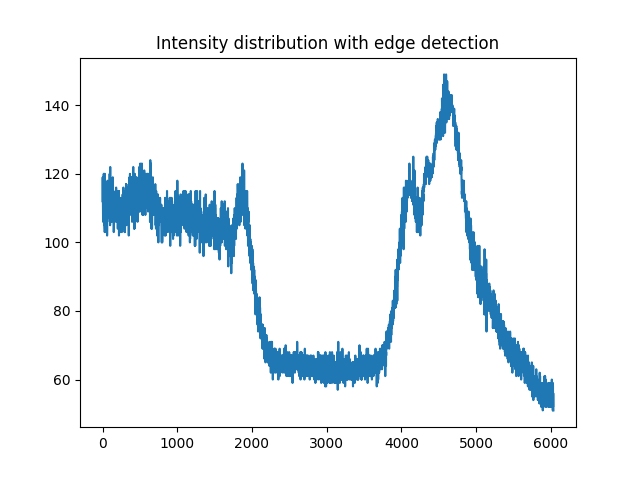

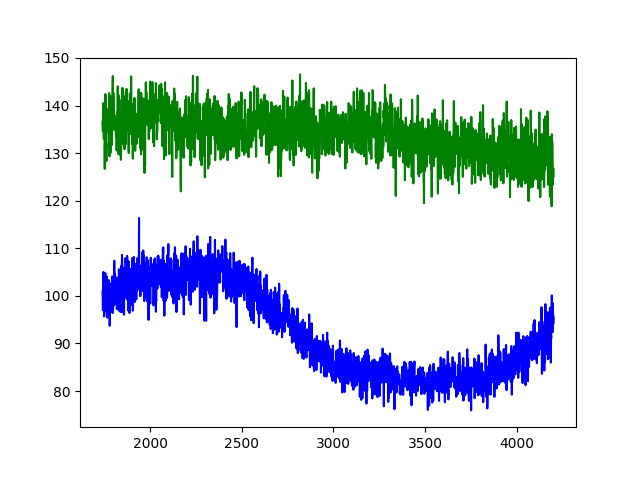

In [3]:
#Global variables
# filepath_ = '_DSC2834.NEF'
# filepath_0 = '_DSC2821.NEF'
filepath_ = '_DSC2834.NEF'
filepath_0 = '_DSC2821.NEF'

x_min_electrode = 1740
x_max_electrode = 4200
y_min = 1800
y_max = 3357
width_electrode_m = 6e-3
dpxl_m = width_electrode_m/ (x_max_electrode - x_min_electrode) #pixel size
y_crssctn =  y_min + (y_max - y_min)//2 

x_pxl_electrode = np.linspace(x_min_electrode, x_max_electrode, x_max_electrode-x_min_electrode)

# Extract intensity values
intensity_full = extract_intensity(filepath_,x_min_electrode, x_max_electrode,y_crssctn)
intensity_0_full = extract_intensity(filepath_0, x_min_electrode, x_max_electrode,y_crssctn)

color_rectangle_on_nef(filepath_, x_min_electrode, x_max_electrode, y_min, y_max)
edge_detection(filepath_, x_min_electrode, x_max_electrode, y_min, y_max)

plt.figure()
plt.plot(x_pxl_electrode, intensity_full, 'b-', label="Original Intensity")  # Original intensity profile
plt.plot(x_pxl_electrode, intensity_0_full, 'g-', label="Original Intensity-0")  # Original intensity profile


from scipy.signal import savgol_filter

intensity_full_crssctn=extract_intensity(filepath_, 0,6000, y_crssctn)
smoothed_intensity = savgol_filter(intensity_full_crssctn, window_length=51, polyorder=2)  # window_length and polyorder can be adjusted



plt.figure()
plt.plot(intensity_full_crssctn)
plt.plot(smoothed_intensity)
plt.title("Full row crossection")
plt.show()


y_fit[103.65841592 103.6139189  103.56946668 ... 104.07526281 104.1202221
 104.16522618]	y_0[136.24205885 136.23941941 136.23677784 ... 126.72768466 126.72079331
 126.71389982]
0.2676960816154478
R_0 = 0.0024536585365853656
max radius : [0.         0.00024537 0.00049073 0.0007361  0.00098146 0.00122683
 0.0014722  0.00171756 0.00196293 0.00220829 0.00245366]
index_tau = 0
r = 0.0	tau = 0.486050800366952	 tau(r)=107.71364182203253
index_tau = 100
r = 0.00024536585365853654	tau = 0.4796251341079003	 tau(r)=81.34357540712907
index_tau = 201
r = 0.0004907317073170731	tau = 0.467434287649807	 tau(r)=76.57112205497342
index_tau = 301
r = 0.0007360975609756096	tau = 0.44985150137306373	 tau(r)=72.21329243118578
index_tau = 402
r = 0.0009814634146341462	tau = 0.4267409998492533	 tau(r)=67.44973337722227
index_tau = 502
r = 0.0012268292682926828	tau = 0.39884362877825835	 tau(r)=61.96859128456313
index_tau = 603
r = 0.0014721951219512192	tau = 0.36594557295143926	 tau(r)=55.633669454837545
inde

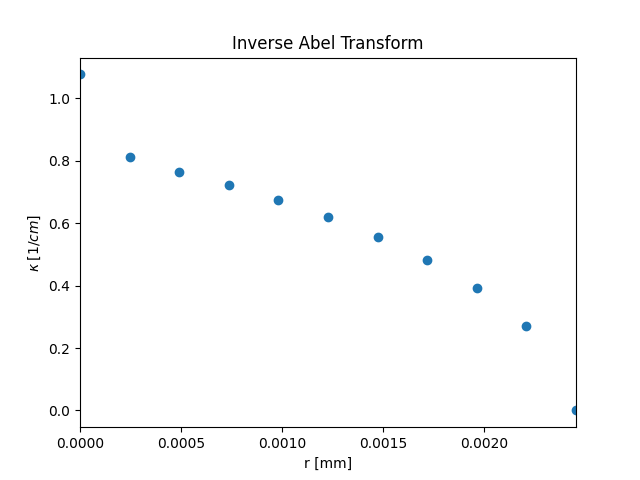

**************

 Manually computed Abel integral: 82.73693659438756


C:\Users\DARYNA\AppData\Local\Temp\ipykernel_27592\549907032.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(integrand_abel, r, r0, args=(r, tau_prime, x_values))


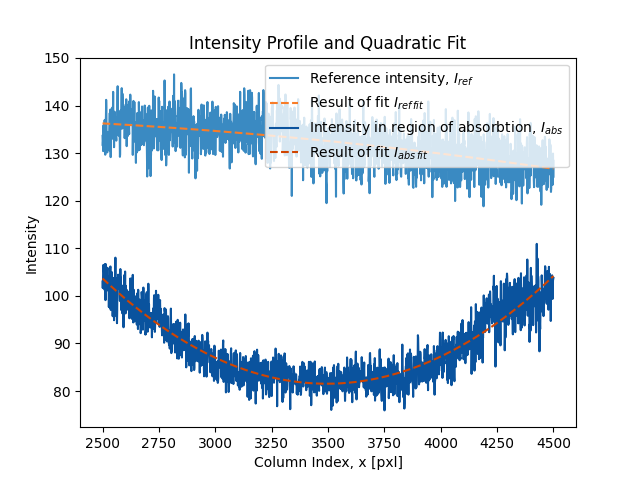

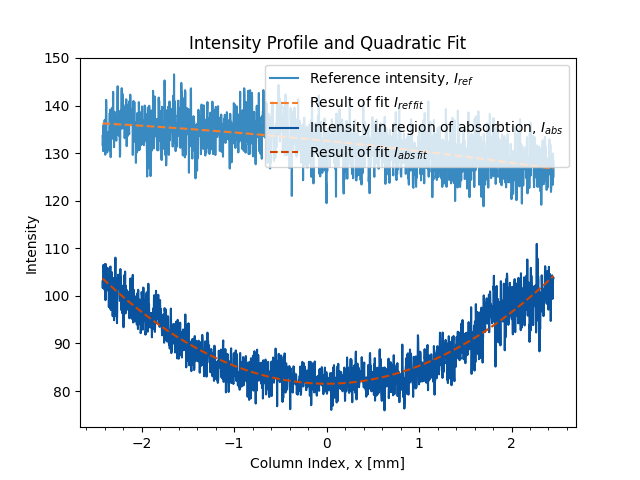

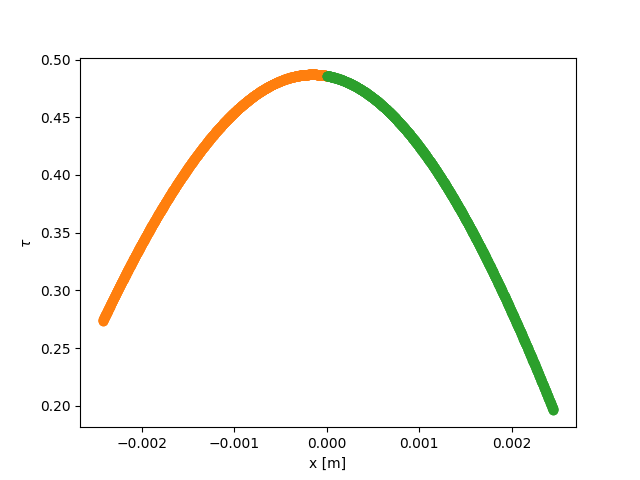

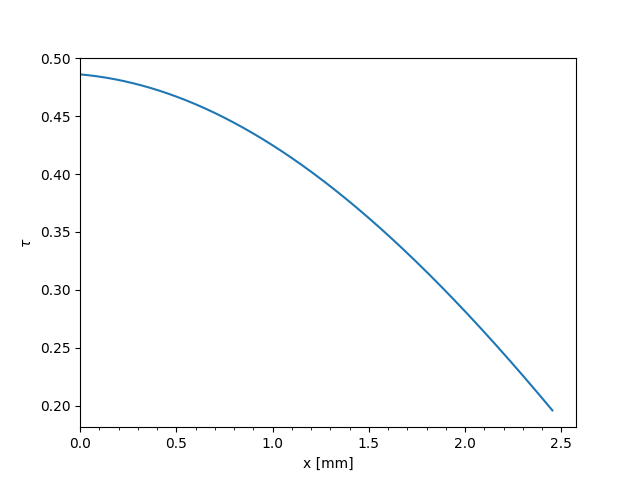

: 

In [ ]:
#work version

# Create the x values (column indices) with the same length as the intensity array
def tau_r(i:np.ndarray, i_0:np.ndarray):
    tau = np.log(i_0/i)
    return tau

def integrand_abel(x: float, r: float, tau_prime: np.ndarray, x_values: np.ndarray) -> float:
    x_index = np.argmin(np.abs(x_values - x))  # Find the nearest index in x_values corresponding to x
    if x_index >= len(tau_prime):  # Ensure the index does not exceed the tau_prime array length
        return 0
    return -tau_prime[x_index] / (np.sqrt(x**2 - r**2) * np.pi)

def compute_integral(r: float, r0: float,  tau_prime: np.ndarray, x_values: np.ndarray) -> float:
    result, error = quad(integrand_abel, r, r0, args=(r, tau_prime, x_values))
    return result

def integral_summator(  r: float, r0: float, tau_prime: np.ndarray, x_values: np.ndarray) -> float:
    summ =0
    dx = 1e-6
    r_space = np.arange(r+dx, r0, dx )
    for x in r_space:
        x_index = np.argmin(np.abs(x_values - x))  # Find the nearest index in x_values corresponding to x
        summ += -tau_prime[x_index] *dx/ (np.sqrt(x**2 - r**2) * np.pi)
    return summ



def integrand_abel_manual(x: float, r: float, tau_prime: np.ndarray, x_values: np.ndarray) -> float:
    """
    Calculate the integrand for Abel's integral using the given tau_prime values.
    Args:
        x: Current x value in the integral.
        r: Radius at which to compute the Abel integral.
        tau_prime: Derivative of tau as an array.
        x_values: Array of x values (spatial coordinates).
    
    Returns:
        Value of the Abel integrand at point x.
    """
    x_index = np.argmin(np.abs(x_values - x))  # Find the nearest index in x_values corresponding to x
    if x**2 - r**2 <= 0:
        return 0  # To handle potential singularity at x = r, avoid negative sqrt term
    return -tau_prime[x_index] / (np.sqrt(x**2 - r**2) * np.pi)


def compute_abel_integral_trapezoidal(r: float, r0: float, tau_prime: np.ndarray, x_values: np.ndarray) -> float:
    """
    Compute the Abel integral using the trapezoidal rule.
    
    Args:
        r: The radius at which we compute the integral.
        r0: Upper limit of the integration.
        tau_prime: Derivative of tau array.
        x_values: Array of x values.
        
    Returns:
        The computed Abel integral value at radius r.
    """
    
    # Initialize the integral result
    integral_result = 0.0
    
    # Loop over the x_values for trapezoidal integration
    for i in range(1, len(x_values)):
        x1 = x_values[i-1]
        x2 = x_values[i]
        
        # Skip cases where x1 or x2 are less than r, which would lead to negative sqrt
        if x1 <= r or x2 <= r:
            continue
        
        # Compute the integrand values at x1 and x2
        integrand_x1 = integrand_abel_manual(x1, r, tau_prime, x_values)
        integrand_x2 = integrand_abel_manual(x2, r, tau_prime, x_values)
        
        # Apply trapezoidal rule
        integral_result += 0.5 * (integrand_x1 + integrand_x2) * (x2 - x1)
    
    return integral_result

def manual_gradient(y, x):
    dy = np.zeros_like(y)
    dx = np.diff(x)

    # Use central differences for internal points
    dy[1:-1] = (y[2:] - y[:-2]) / (x[2:] - x[:-2])

    # Forward difference at the start and backward difference at the end
    dy[0] = (y[1] - y[0]) / (x[1] - x[0])
    dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])

    return dy

x_min = 2500
x_max = 4500
x_pxl = np.linspace(x_min, x_max, x_max-x_min)
x_m = x_pxl*dpxl_m

# Extract intensity values
intensity = extract_intensity(filepath_,x_min, x_max,y_crssctn)
intensity_0 = extract_intensity(filepath_0, x_min, x_max,y_crssctn)


# Fit the intensity profile with a quadratic function
coef, quadratic_func = fit_quadratic(x_pxl, intensity)
coef_0, quadratic_func_0 = fit_quadratic(x_pxl, intensity_0)

# Generate the fitted y values
y_fitted = quadratic_func(x_pxl)
y_fitted_0 = quadratic_func_0(x_pxl)

colorsBlue = plt.cm.Blues(np.linspace(0.55, 0.95, 20))  # Light to dark blue
colorsOrange = plt.cm.Oranges(np.linspace(0.45, 0.85, 20))
# plot intensities and fitted profile
plt.figure()
plt.plot(x_pxl, intensity_0, color=colorsBlue[5], label=r"Reference intensity, $I_{ref}$")  # Original intensity profile
plt.plot(x_pxl, y_fitted_0, '--', color=colorsOrange[5],label=r"Result of fit $I_{ref\,fit}$")  # Fitted quadratic curve
plt.plot(x_pxl, intensity, color=colorsBlue[15], label=r"Intensity in region of absorbtion, $I_{abs}$")  # Original intensity profile
plt.plot(x_pxl, y_fitted, '--',color=colorsOrange[15], label=r"Result of fit $I_{abs\,fit}$")  # Fitted quadratic curve
plt.xlabel("Column Index, x [pxl]")
plt.ylabel("Intensity")
plt.title("Intensity Profile and Quadratic Fit")
plt.legend(loc='upper right')

# Compute tau
# tau = tau_r(intensity, intensity_0)
tau = tau_r(y_fitted, y_fitted_0)
print(f"y_fit{y_fitted}\ty_0{y_fitted_0}")
print(tau_r(104.13336246,136.0970849))


x_central_point = x_min + np.argmin(y_fitted)
# x_central_point = (x_min + x_max) / 2
x_real_m = (x_pxl - x_central_point) * dpxl_m   # Shift to center and convert to meters
zero_index = np.argmin(np.abs(x_real_m))

#Split tau in two arrays
tau_negative = tau[:zero_index + 1]  # Tau from -r to 0
tau_positive = tau[zero_index:]      # Tau from 0 to r
x_real_m_negative = x_real_m[:zero_index + 1]  # x_real_m from -r to 0
x_real_m_positive = x_real_m[zero_index:]      # x_real_m from 0 to r
# print(f'len tau positive: {len(tau_positive)}')

fig1, ax1 = plt.subplots()
ax1.plot(x_real_m*mm, intensity_0, color=colorsBlue[5], label=r"Reference intensity, $I_{ref}$")  # Original intensity profile
ax1.plot(x_real_m*mm, y_fitted_0, '--', color=colorsOrange[5],label=r"Result of fit $I_{ref\,fit}$")  # Fitted quadratic curve
ax1.plot(x_real_m*mm, intensity, color=colorsBlue[15], label=r"Intensity in region of absorbtion, $I_{abs}$")  # Original intensity profile
ax1.plot(x_real_m*mm, y_fitted, '--',color=colorsOrange[15], label=r"Result of fit $I_{abs\,fit}$")  # Fitted quadratic curve
ax1.set_xlabel("Column Index, x [mm]")
ax1.set_ylabel("Intensity")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax1.set_title("Intensity Profile and Quadratic Fit")
plt.legend(loc='upper right')


plt.figure()
plt.plot(x_real_m, tau)
plt.plot(x_real_m_negative, tau_negative, 'o')
plt.plot(x_real_m_positive, tau_positive, 'o')
plt.xlabel("x [m]")
plt.ylabel(r"$\tau$")

# Plot tau (r)
fig3,ax3 = plt.subplots()
ax3.plot(x_real_m_positive*mm, tau_positive)
ax3.set_xlabel("x [mm]")
ax3.set_ylabel(r"$\tau$")
ax3.set_xlim(left=0)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Compute the integral
r0 = max(x_real_m)
print(f"R_0 = {r0}")
N =11
dr = r0/N
# radius = np.arange(0,r0, dr)
radius  = np.linspace(0, r0, N)
print(f"max radius : {(radius)}")
integrate_result = np.empty_like(radius)
tau_prime = np.gradient(tau_positive, x_real_m_positive)

# Loop over the radius array
for i, r in enumerate(radius):
    index_tau = int(r // dpxl_m)
    print(f"index_tau = {index_tau}")
    # Compute integral and store in integrate_result
    integrate_result[i] = integral_summator(r=r, r0=r0, tau_prime=tau_prime, x_values=x_real_m_positive)
    # integrate_result[i] = compute_abel_integral_trapezoidal(r=r, r0=r0, tau_prime=tau_prime, x_values=x_real_m_positive)

    print(f"r = {r}\ttau = {tau_positive[index_tau]}\t tau(r)={integrate_result[i]}")

fig2, ax2 = plt.subplots()
ax2.scatter(radius, integrate_result*1e-2)
ax2.set_title("Inverse Abel Transform")
ax2.set_xlabel("r [mm]")
ax2.set_ylabel(r"$\kappa\;[1/cm]$")
ax2.set_xlim(0,r0)
plt.show()

print('**************')
r = radius[0]
integral_result = compute_integral(r=r0/N, r0=r0, tau_prime=tau_prime, x_values=x_real_m_positive)
print(f"\n Manually computed Abel integral: {integral_result}")


r_kappa = [0.         0.00024537 0.00049073 0.0007361  0.00098146 0.00122683
 0.0014722  0.00171756 0.00196293 0.00220829 0.00245366]
st_sum: 2.513595313518468	d_lambda_m: 0.0034633915463876046	n_i: 532872200.41456884
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633846070800897	n_i: 402415538.4161457
st_sum: 2.5133261857269784	d_lambda_m: 0.003463377667758671	n_i: 378804932.2415891
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633707284233485	n_i: 357245601.2572904
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633637890741217	n_i: 333679180.9900224
st_sum: 2.5133261857269784	d_lambda_m: 0.003463356849710991	n_i: 306562922.05929667
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633499103339563	n_i: 275223072.63427776
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633429709430173	n_i: 238324403.000259
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633360315381744	n_i: 193374113.17002457
st_sum: 2.5133261857269784	d_lambda_m: 0.0034633290921194273	n_i: 134589350.48911327
st_sum: 2.513326185726978

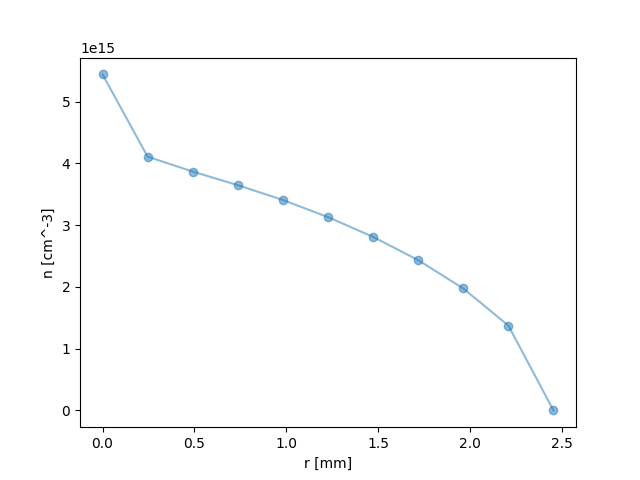

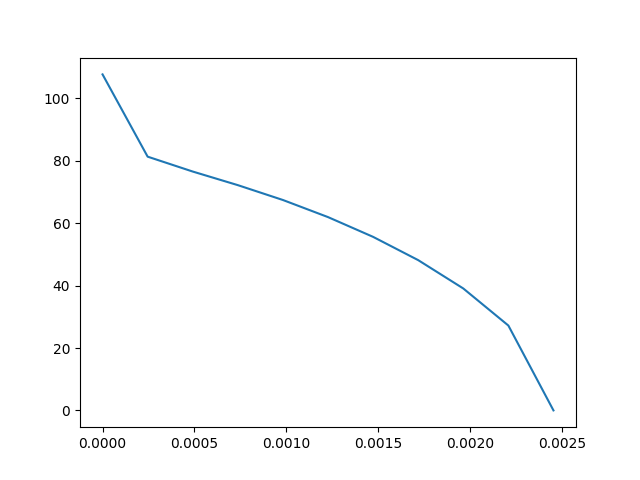

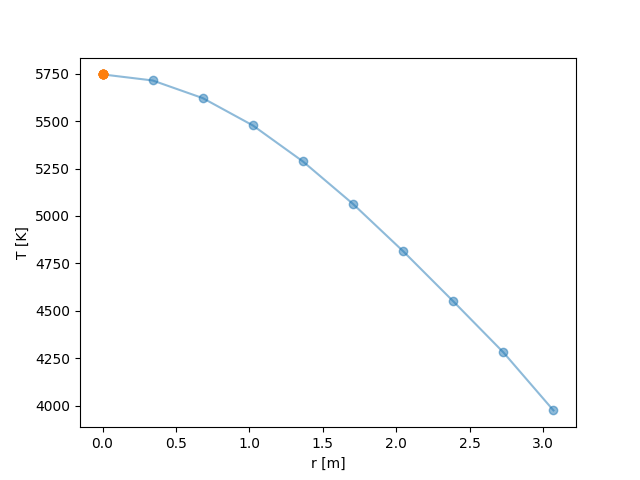

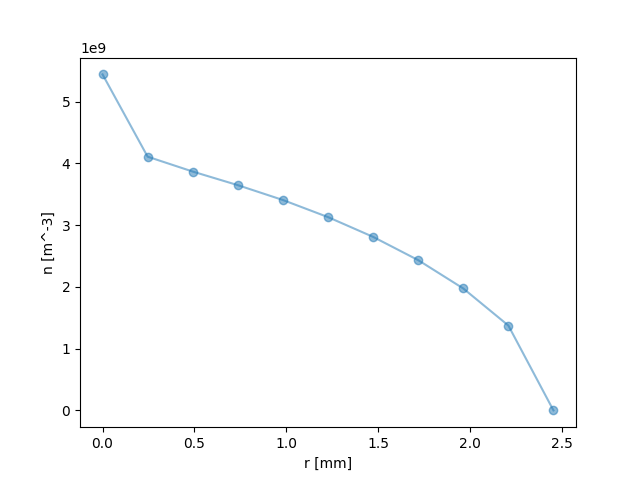

In [5]:
nm = 1e-9
eV = 1.602*1e-19

import os
from io import StringIO

#Formulas for concentration calculation
"""Поглинаючий рівень - i"""

def delta_lambda_dopler (lambda_m: float, t_K: float, mu: float) -> float:
    return 7.16e-7*lambda_m*np.sqrt(t_K/mu)


def concentration_n_i(delta_lambda_m: float, lambda_m:float, f_ik:float,kappa:float) -> float:
    n_i = kappa*1e2*delta_lambda_m/nm / (8.19e-20*f_ik*(lambda_m/nm)**2)
    return n_i


def concentration_n (n_i:float, stat_sum:float, g_i:float, e_i:float, t_K:float):
    """e_i - енергія рівня 4s2 2D5/2"""
    n = n_i*stat_sum*np.exp(e_i/k_B/t_K)/g_i
    return n


def stat_sum_read(file_path: str, temperature_value: int) -> float:
    """In .txt file there are values of stat sum. Number of line corresponds to
    temperature value.
    This function reads lines from the file and returms a value of stat sum.
    """
    with open(file_path, 'r') as file:
        data = file.readlines()
    stat_sum = np.array([float(line.strip()) for line in data])
    return stat_sum[temperature_value]

def read_txt_to_array(file_path: str) -> np.ndarray:
    data = np.loadtxt(file_path, delimiter=None)
    return data

# Define the function to calculate concentration
def calculate_concentration(radius, t_profile_interpolated, kappa_profile, filepath_statsum, lambda_m, mu_Cu, f_ik, g_k, E_i):
    """
    This function calculates the concentration for each radius point using the temperature profile and 
    kappa profile. It returns the concentration array n.
    
    Parameters:
    - radius: array of radius values
    - t_profile_interpolated: interpolated temperature profile
    - kappa_profile: kappa profile as a function of radius
    - filepath_statsum: file path for the statistical sum data
    - lambda_m: wavelength in meters
    - mu_Cu: atomic mass of copper
    - f_ik: oscillator strength
    - g_k: statistical weight
    - E_i: energy of the level
    
    Returns:
    - n: calculated concentration array
    """
    
    n = np.empty_like(radius)  # Create array for concentration values

    for i, r in enumerate(radius):
        current_T_K = t_profile_interpolated[i]  # Current temperature at index i
        stat_sum = stat_sum_read(filepath_statsum, int(current_T_K))
        d_lambda_m = delta_lambda_dopler(lambda_m=lambda_m, t_K=current_T_K, mu=mu_Cu)
        n_i = concentration_n_i(delta_lambda_m=d_lambda_m, lambda_m=lambda_m, f_ik=f_ik, kappa=kappa_profile[i])
        print(f'st_sum: {stat_sum}\td_lambda_m: {d_lambda_m}\tn_i: {n_i}')
        # Calculate final concentration n using the given formula
        n[i] = concentration_n(n_i=n_i, stat_sum=stat_sum, g_i=g_k, e_i=E_i, t_K=current_T_K)
    return n


k_B = 1.38e-23
E_i = 1.38*eV 
E_k = 3.82*eV
mu_Cu = 64
g_i = 6
g_k = 4
f_ik = 0.00328
lambda_m = 510.5

foldername = 'plots_and_results'
filename = 'Statsum_CuI.txt'
filename_temperature = 'temperature_profile.txt'
filepath_statsum = os.path.join(foldername, filename)
filepath_temperature = os.path.join(foldername,filename_temperature)
data_temp = read_txt_to_array(filepath_temperature)

t_profile_K =data_temp[:,1]
r_t_K = data_temp[:,0]
kappa_profile = integrate_result
r_kappa = radius
print(f'r_kappa = {r_kappa}')

# Interpolate t_profile_K to match the length of kappa_profile
t_profile_interpolated = np.interp(r_kappa, r_t_K, t_profile_K)

n_values = calculate_concentration(radius, t_profile_interpolated, kappa_profile, filepath_statsum, lambda_m, mu_Cu, f_ik, g_k, E_i)
print(n_values)

plt.figure()
plt.plot(r_kappa,kappa_profile)

fig, ax = plt.subplots()
ax.plot(r_t_K,t_profile_K,"o-", alpha=0.5, label = 'Input temperature profile')
ax.plot(r_kappa, t_profile_interpolated, 'o-', alpha=0.5, label='Interpolated temperature profile')
ax.set_xlabel(r'r [m]')
ax.set_ylabel(r'T [K]')

fig, ax = plt.subplots()
ax.plot(radius*mm,n_values,"o-", alpha=0.5, label = 'Concentration')
ax.set_xlabel(r'r [mm]')
ax.set_ylabel(r'n [m^-3]')

fig, ax = plt.subplots()
ax.plot(radius*mm,n_values*1e6,"o-", alpha=0.5, label = 'Concentration')
ax.set_xlabel(r'r [mm]')
ax.set_ylabel(r'n [cm^-3]')

plt.show()



In [6]:
k_B = 1.38e-23

In [7]:
def concentration(n_i:float, stat_sum:float, g_i:float, e_i:float, temperature: float) -> float:
    n = n_i * stat_sum / g_i / np.exp(-e_i/k_B/ temperature)
    return n

def n_i (kappa: float, d_lambda_m: float, f_ik: float, lambda_m: float) -> float:
    n_i_ = kappa * d_lambda_m / 8.19e-20 / 
stat_sum_read
read_txt_to_array()

SyntaxError: invalid syntax (3468417724.py, line 6)